## Creating some random points

In [1]:
import numpy as np

In [2]:
# multivariate_normal function generates random points
# around a given mean point and using a covariance matrix

# covariance simply put is the effect of one axis 
# on the given distribution

# covariance matrix
#    x,y
# x [1,0]
# y [0,1]
# this means that the distribution is uniform along both axes


# generates 200 random points for class 1
mean1 = np.array([5,5])
cov1 = np.array([[1,0],[0,1]])
class1 = np.random.multivariate_normal(mean1, cov1, 200)

# generates 200 random points for class 2
mean2 = np.array([8,8])
cov2 = np.array([[1,0],[0,1]])
class2 = np.random.multivariate_normal(mean2, cov2, 200)

## Plotting the points

In [3]:
# importing matplotlib library for plotting graphs
import matplotlib.pyplot as plt

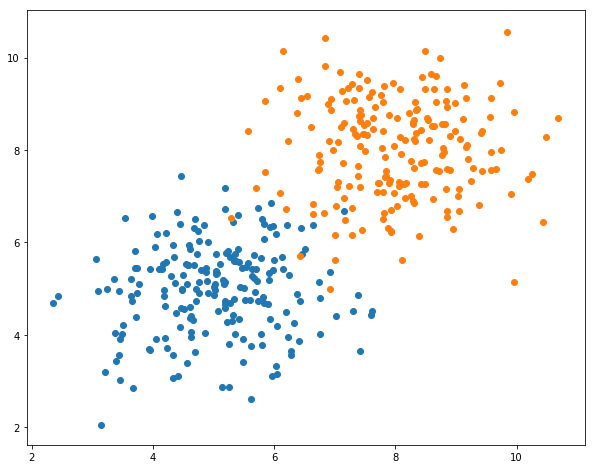

In [4]:
plt.figure(figsize=(10,8))

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

plt.show()

## Creating dataset

In [5]:
# appending datapoints from both classes 
# into a single array
features = np.append(class1, class2, axis=0)

# generating labels
# 200 zeros and 200 ones in a single array
labels = np.append(np.zeros(200), np.ones(200))

## Creating the model

In [6]:
import keras

# imports sequential model class
from keras.models import Sequential

# imports Dense layer class 
# A layer of perceptrons
from keras.layers import Dense

Using TensorFlow backend.


In [14]:
# Creates a sequential model
model = Sequential()

# Adds a Dense layer to the model
# 5 Units in this layer
# sigmoid is used as the activation layer
# input shape is defined for the first layer, there are 2 features
model.add(Dense(5, activation='sigmoid', input_shape=(2,)))

# Adds another Dense layer to the model
# 1 Unit in this layer
# sigmoid is used as the activation layer

# this is the output layer
# since there are only 2 classes,
# only 1 neuron is sufficient at the output
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
# since there are 2 classes
# binary crossentropy is used
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### The final model

In [15]:
# Gives the summary of the model which was just create

# the architecture of this model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 5)                 15        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


### Fitting the data in the model

In [16]:
# xtrain = datapoints or features
# ytrain = one-hot encoded labels
# epochs = number of times the model needs to be trained 
# validation_split = How much data to be used for validating the training
# batch_size = how many data points to use at a time

# batch_size = 1 (Stochastic)
# batch_size = all data points (Batch)
# batch_size = between 1 and all (mini-batch)

model.fit(features, labels, epochs=25, batch_size=1)

Epoch 1/25
400/400 [==============================] - 1s 3ms/step - loss: 0.6723 - acc: 0.6775
Epoch 2/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6579 - acc: 0.7375
Epoch 3/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6482 - acc: 0.9025
Epoch 4/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6386 - acc: 0.8550
Epoch 5/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6293 - acc: 0.9050
Epoch 6/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6180 - acc: 0.9325
Epoch 7/25
400/400 [==============================] - 1s 2ms/step - loss: 0.6053 - acc: 0.9450
Epoch 8/25
400/400 [==============================] - 1s 2ms/step - loss: 0.5936 - acc: 0.9350
Epoch 9/25
400/400 [==============================] - 1s 2ms/step - loss: 0.5802 - acc: 0.9675
Epoch 10/25
400/400 [==============================] - 1s 2ms/step - loss: 0.5517 - acc: 0.9625
Epoch 11/25
400/400 [============================

## Evaluating the model

To evaluate the model, we will classify EVERY point on the graph to create a decision boundary and using that boundary we can identify how well the classes are separated from each other

#### creating test points

In [17]:
# generates points between 2 and 12 
# at a distance of 0.05 units
xtest = np.arange(2,12,0.05)

# creates a meshgrid using the points
# for more detailed understanding
# refer "utils" notebook in this folder
xtest = np.meshgrid(xtest,xtest)

# creates a hstack using the points
# for more detailed understanding
# refer "utils" notebook in this folder
xtest = np.hstack([xtest[0].reshape(-1,1), xtest[1].reshape(-1,1)])

In [18]:
# Predicts class of each test point

model.predict(xtest)

array([[0.00746305],
       [0.00768127],
       [0.00790857],
       ...,
       [0.9313899 ],
       [0.93157786],
       [0.9317603 ]], dtype=float32)

In [19]:
# rounded off to get an integer class of 0 or 1
output = np.round(model.predict(xtest))

# flattened out the output so that it can be used 
# as the color class for the test point
output = output.flatten()

#### Predicting each point on the graph

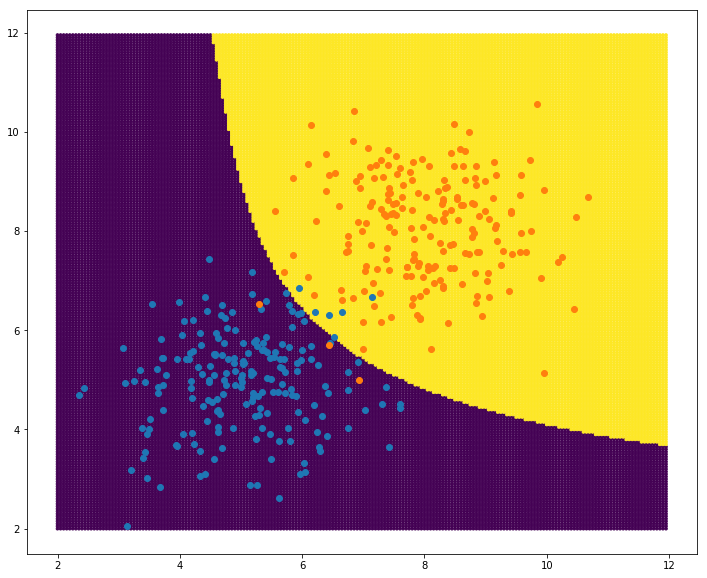

In [20]:
plt.figure(figsize=(12,10))

# plotted all the test point using
# PREDICTIONS AS THE COLORMAP
# for better understanding 
# refer "utils" notebook
plt.scatter(xtest[:,0], xtest[:,1], c=output, s=7)

plt.scatter(class1[:,0], class1[:,1])
plt.scatter(class2[:,0], class2[:,1])

plt.show()